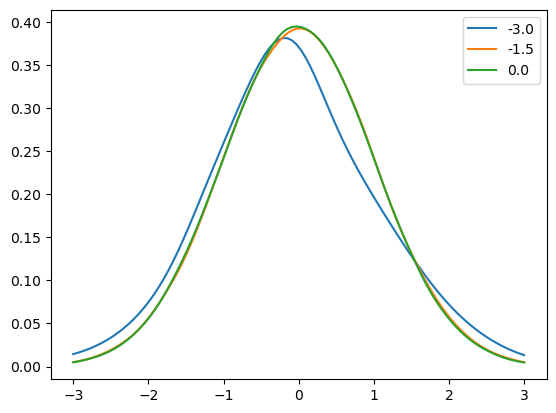

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdfs = []
for i in range(20):
    pdfs.append(np.zeros((3, 100)))
    data = np.random.multivariate_normal((0,0), [[1,0],[0,1]], int(5e5))
    for c,slc in enumerate(np.linspace(-4, 0, 3)):
        data_slice = data[(data[:,0]>=slc) & (data[:,0]<=slc+0.1), 1]
        kde = gaussian_kde(data_slice)
        pdfs[-1][c] = kde.pdf(np.linspace(-3, 3, 100))
pdfs = np.array(pdfs).mean(axis=0)

for c,i in enumerate(np.linspace(-3, 0, 3)):
    plt.plot(np.linspace(-3, 3, 100), pdfs[c], label=i)
plt.legend();


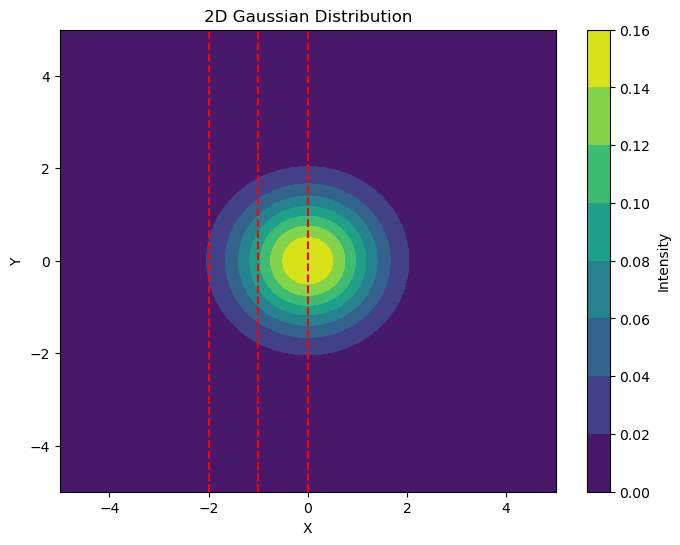

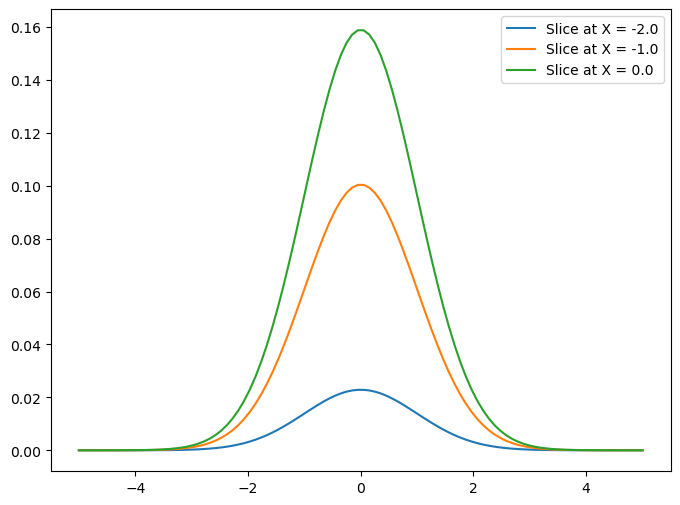

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Parameters of the 2D Gaussian
mux = 0
muy = 0
sigmax = 1
sigmay = 1

# Create the multivariate normal distribution
rv = multivariate_normal([mux, muy], [[sigmax**2, 0], [0, sigmay**2]])

# Evaluate the 2D Gaussian function
Z = rv.pdf(np.dstack((X, Y)))

# Plot the 2D Gaussian
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Gaussian Distribution')

# Plot a slice of the Gaussian along a certain X value (e.g., X = 0)
for slice_x in np.linspace(-2, 0, 3):
    plt.axvline(slice_x, color='r', linestyle='--', label=f'X = {slice_x}')

# Plot a slice of the Gaussian along a certain X value (e.g., X = 0)
plt.figure(figsize=(8,6))
for slice_x in np.linspace(-2, 0, 3):
    idx = np.argmin(np.abs(x - slice_x))
    plt.plot(x, Z[:, idx], label=f'Slice at X = {slice_x}')
plt.legend()
plt.show()
